# Imports and instance input

In [18]:
import time
from linearSolver import LinMod
from utils import Input, Plot_graph, Plot_route, Calculate_distance, Calculate_cost, Download_excel
from heuristics import route_Closest_Neighbour, route_Clarke_Wright, route_Nearest_Insertion, two_opt
from geneticAlgorithm import Plot_fitness, GA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input("Instances\Inst40_1.xlsx")

# Approaches to the TSP with relaxed Time WIndows


## Linear Solver

In [3]:
cost_linearSolver, succ_linearSolver, route_linearSolver, time_linearSolver = LinMod(n, pen, dist, dmax, a, b)

Solving time 300.0
Variables :
Cost of the route found with linear solver (time limit of 5 min): 9315.84
Optimal route :  [ 0 27 28 12 39 23 22 14 16 38 37  2 15 21 26  4 25 24  9 33 29  3 34 35
  1 31 10 32 30 20 36 11 19  7 18  8 17  5  6 13  0]


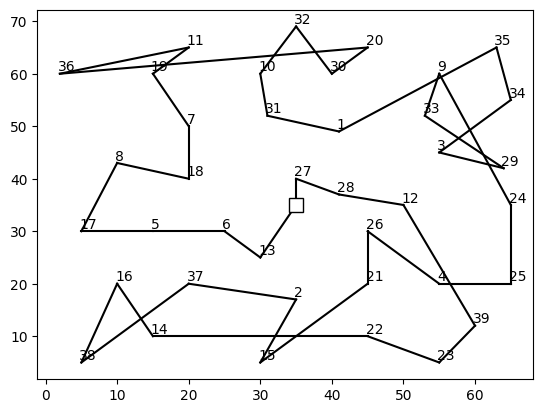

In [4]:
Plot_route(cox, coy, route_linearSolver)

Given it consists on a problm with NP-hard complexity, there is no known efficient solution for the general case, and the the use of solvers to find the optima solution may take a long time for larger instances.

To find a satisfactory solution in a shorter time, we test some heuristics:

## Closest Neighbour

In [5]:

print("Closest Neighbour")
wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input("Instances\Inst40_1.xlsx")
start_time = time.time()
distance_closestNeighbour, cost_closestNeighbour, route_closestNeighbour = route_Closest_Neighbour(n, dist, a, b, dmax, pen, 0)
end_time = time.time()
time_closestNeighbour = end_time - start_time
print(f"test -> Distance: {round(distance_closestNeighbour, 2)}, Cost: {round(cost_closestNeighbour, 2)} time: {round(time_closestNeighbour, 4)}")

# Plot_route(cox, coy, tour)

# N = [40, 100]
# for n in N:
#   for i in range(1,4):
#     wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax  = Input(f"Instances/Inst{n}_{i}.xlsx")
#     start_time = time.time()
#     distance ,cost, tour = route_Closest_Neighbour(n, dist, a, b, dmax, pen, 0)
#     end_time = time.time()
#     print(f"Inst{n}_{i} -> Distance: {round(distance, 2)}, Cost: {round(cost, 2)} time: {round(end_time - start_time, 4)}")

Closest Neighbour
test -> Distance: 485.24, Cost: 8807.43 time: 0.001


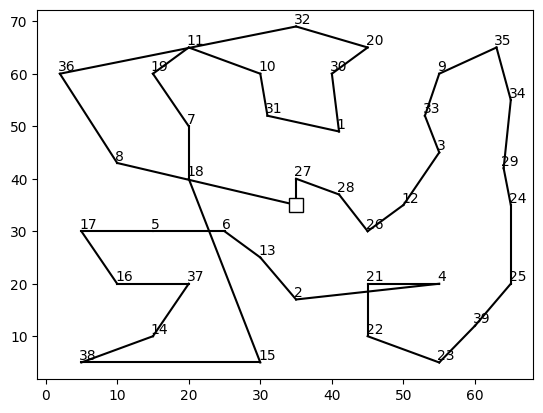

In [6]:
Plot_route(cox, coy, route_closestNeighbour)

## Clarke & Wright

In [7]:
print("Clarke & Wright")
wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input("Instances\Inst40_1.xlsx")
start_time = time.time()
distance_ClarkeWright, route_ClarkeWright = route_Clarke_Wright(n, dist, 0)
cost_ClarkeWright = Calculate_cost(dist, a, b, pen, route_ClarkeWright)
end_time = time.time()
time_ClarkeWright = end_time - start_time
print(f"Instance -> Distance: {round(distance_ClarkeWright, 2)}, Cost: {round(cost_ClarkeWright, 2)} time: {round(time_ClarkeWright, 4)}")

# N = [40, 100]
# for n in N:
#   for i in range(1,4):
#     wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input(f"Instances/Inst{n}_{i}.xlsx")
#     start_time = time.time()
#     distance, tour = route_Clarke_Wright(n, dist, 0)
#     cost = Calculate_cost(dist, a, b, pen, route)
#     end_time = time.time()
#     print(f"Inst{n}_{i} -> Distance: {round(distance, 2)}, Cost: {round(cost, 2)}, time: {round(end_time - start_time, 4)}")

Clarke & Wright
Instance -> Distance: 1252.56, Cost: 18109.62 time: 0.001


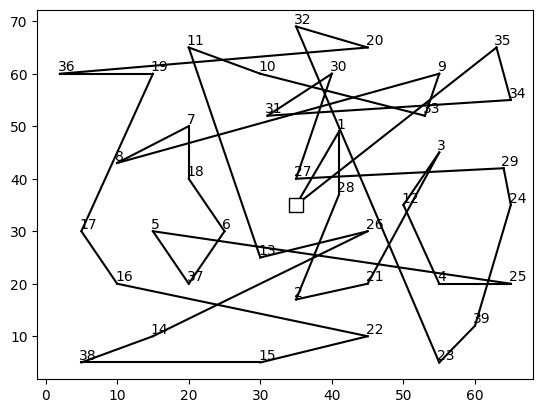

In [8]:
Plot_route(cox, coy, route_ClarkeWright)

## Nearest insertion

In [9]:
print("Nearest insertion")
wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input("Instances\Inst40_1.xlsx")
start_time = time.time()
route_nearestInsertion = route_Nearest_Insertion(n, dist, a, b, pen, dmax)
distance_nearestInsertion = Calculate_distance(dist, route_nearestInsertion)
cost_nearestInsertion = Calculate_cost(dist, a, b, pen, route_nearestInsertion)
end_time = time.time()
time_nearestInsertion = end_time - start_time
print(f"Instance -> Distance: {round(distance_nearestInsertion, 2)}, Cost: {round(cost_nearestInsertion, 2)} time: {round(time_nearestInsertion, 4)}")

# N = [40, 100]
# for n in N:
#   for i in range(1,4):
#     wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input(f"Instances/Inst{n}_{i}.xlsx")
#     start_time = time.time()
#     route = route_Nearest_Insertion(n, dist, a, b, pen, dmax)
#     distance = Calculate_distance(dist, route)
#     cost = Calculate_cost(dist, a, b, pen, route)
#     end_time = time.time()
#     print(f"Inst{n}_{i} -> Distance: {round(distance, 2)}, Cost: {round(cost, 2)} time: {round(end_time - start_time, 4)}")


Nearest insertion
Instance -> Distance: 505.08, Cost: 6958.04 time: 0.016


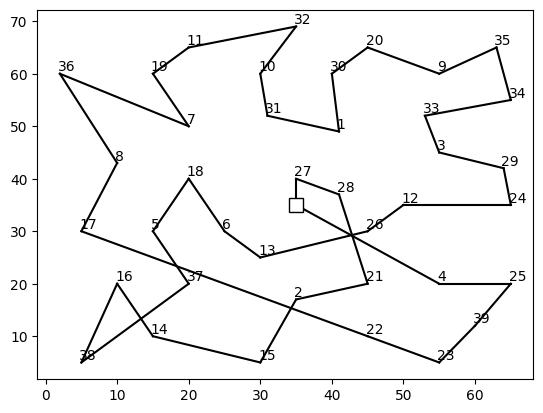

In [10]:
Plot_route(cox, coy, route_nearestInsertion)

## Genetic Algorithm

Initial Population Proportion:
Nearest insertion: 0.16
Closest Neighbour: 0.04
Random routes: 0.8
------------------------------------------------------------

Generations: 50
Population size: 150
Tournament size: 10
Mutation probability: 0.2
------------------------------------------------------------
Gen:    0 , Best of run: 6617.1     , Best so far: 6617.1
Gen:   10 , Best of run: 6450.4     , Best so far: 6450.4
Gen:   20 , Best of run: 6450.4     , Best so far: 6450.4
Gen:   30 , Best of run: 6396.36    , Best so far: 6396.36
Gen:   40 , Best of run: 6396.36    , Best so far: 6396.36
Gen:   49 , Best of run: 6396.36    , Best so far: 6396.36
Running time : 3.468 s


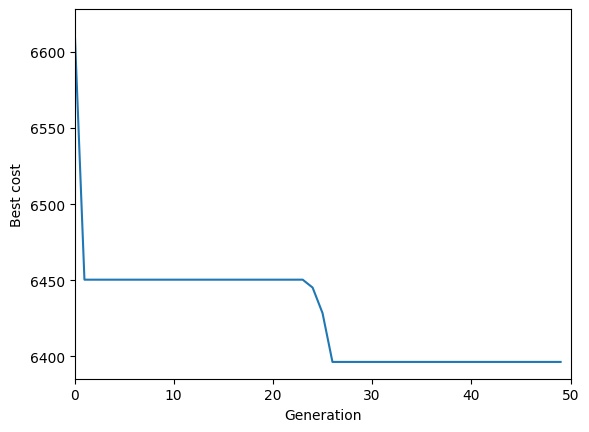

In [29]:
POP_SIZE = 150
GENERATIONS = 50
TOURNAMENT_SIZE = 10
PROB_MUTATION = 0.2

wb, ws, n, pen, dist, dmax, a, b, cox, coy, a, b, dist, dmax = Input("Instances\Inst40_1.xlsx")
cost_GA, route_GA, cumulated_best_cost_GA, best_cost_GA, generations_GA, time_GA = GA(POP_SIZE, GENERATIONS, TOURNAMENT_SIZE, PROB_MUTATION, n, dist, a, b, pen, dmax)
Download_excel("geneticAlgorithm_results", POP_SIZE, generations_GA, n, dist, a, b, pen)
Plot_fitness(GENERATIONS, cumulated_best_cost_GA)

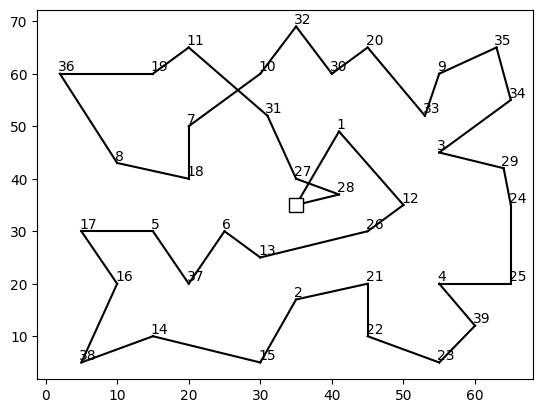

In [32]:
Plot_route(cox, coy, route_GA)

In [33]:
approaches = ["Linear Solver", "Closest Neighbor", "Clark & Wright", "Nearest Insertion", "Genetic Algorithm"]
costs = [cost_linearSolver, cost_closestNeighbour, cost_ClarkeWright, cost_nearestInsertion, cost_GA]
time = [time_linearSolver, time_closestNeighbour, time_ClarkeWright, time_nearestInsertion, time_GA]  # em segundos

approaches_comparison = pd.DataFrame({
    "Approach": approaches,
    "Final Cost": np.round(costs, 2),
    "Time (s)": np.round(time, 4)
})

print(approaches_comparison)

            Approach  Final Cost  Time (s)
0      Linear Solver     9315.84   300.000
1   Closest Neighbor     8807.43     0.001
2     Clark & Wright    18109.62     0.001
3  Nearest Insertion     6958.04     0.016
4  Genetic Algorithm     6396.36     3.468


As we can see, some of the heuristics get satisfactory results for this problem in a quick time. 
Over all, the Genetic Algorithm based on these heuristics is the approach that get the better solution. 